In [1]:
import matplotlib.pyplot as plt
import glob
import astropy
import importlib
import math
import numpy as np
import xlwt
import xlsxwriter
import warnings
warnings.filterwarnings('ignore')

from xlwt import Workbook
from reduct_funcs import funcs_calib_and_plot
from reduct_funcs import funcs_star_finder
from reduct_funcs import funcs_apt_phot
from reduct_funcs import funcs_utils
from reduct_funcs import funcs_polarimetry

importlib.reload(funcs_calib_and_plot)
importlib.reload(funcs_star_finder)
importlib.reload(funcs_apt_phot)
importlib.reload(funcs_utils)
importlib.reload(funcs_polarimetry)

#This notebook plots the polarization data that we worked so hard to get.

<module 'reduct_funcs.funcs_polarimetry' from 'C:\\Users\\afiq-Astro\\Desktop\\TSSP\\reductions_3\\reduct_funcs\\funcs_polarimetry.py'>

In [2]:
MJD = '2020-03-05'
obs_filter='P1-R'
targ_name='EE_Cep'
low_pol_std='G191B2B'
high_pol_std='HD215806'
#load here
#basic pipe
target = "./stats/"+MJD +"/target/"+targ_name+"/"+obs_filter+"/master_2020-03-05_eecep_P1-R0-51.xlsx"
zero_pol_std = "./stats/"+MJD +"/pol_std/"+low_pol_std+"/"+obs_filter+"/master_2020-03-05_g191b2b_P1-R0-23_swapped.xlsx"
high_pol_std = "./stats/"+MJD +"/pol_std/"+high_pol_std+"/"+obs_filter+"/master_2020-03-05_hd215806_P1-R46-76_swapped.xlsx"

target_data = funcs_polarimetry.load_pol_data(target)
zero_pol_std = funcs_polarimetry.load_pol_data(zero_pol_std)
high_pol_std = funcs_polarimetry.load_pol_data(high_pol_std )

Target PD: 0.21882792089832004
Zero pol PD: 0.48941572347259826
Target PD: 1.3160407440234732

Target PA: 0.38638480989056934
Zero pol std PA: 0.41232877499265896
High pol std PA: 0.39231355291057834

Zero Pol Offset q: 0.359385486762447 u: 0.33221953929100223 



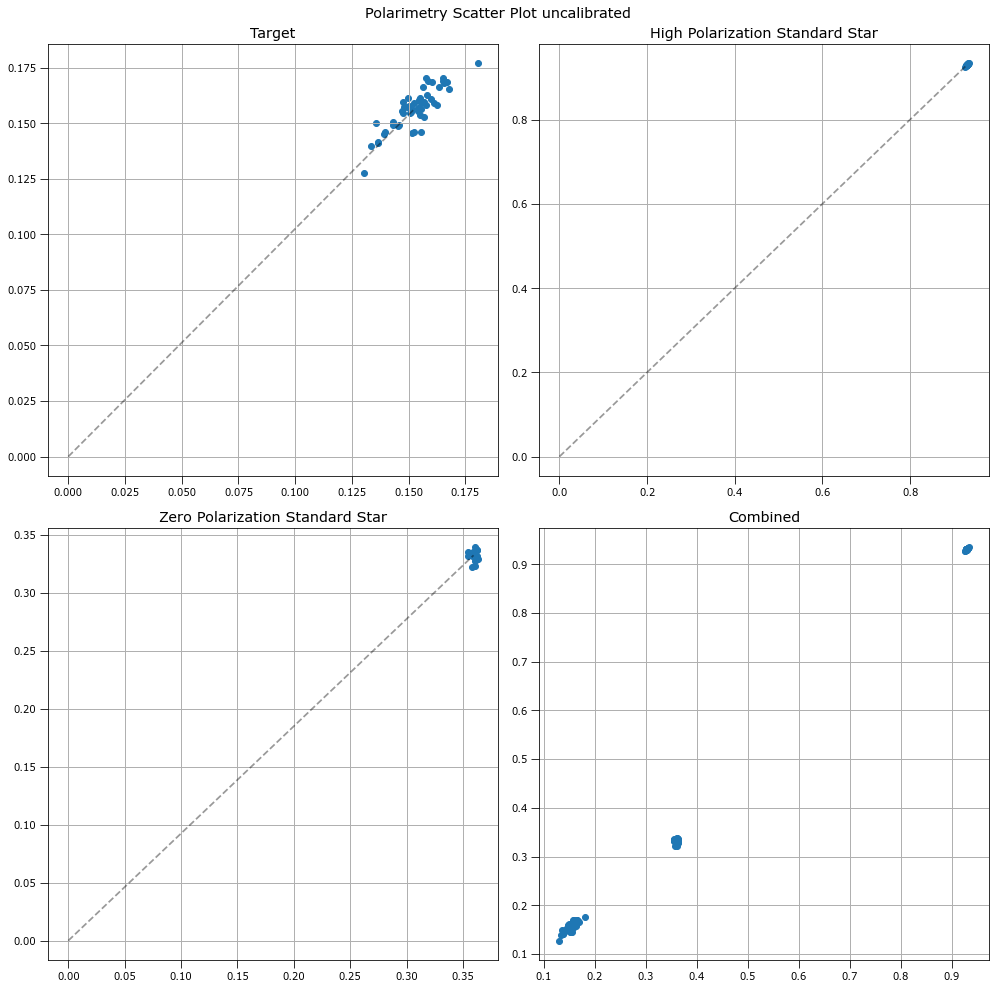

In [3]:
#this is the target

funcs_polarimetry.q_n_u_stack_plot(target_data, zero_pol_std, high_pol_std, 'uncalibrated' ,True )

zero_pol_mean_q, zero_pol_mean_u, median_q, median_u = funcs_polarimetry.q_u_stats(zero_pol_std[0][1:] ,zero_pol_std[1][1:] ,zero_pol_std[2][1:] ,zero_pol_std[3][1:] )
target_pd, zero_pol_pd, high_pol_pd = funcs_polarimetry.calc_pd(target_data, zero_pol_std, high_pol_std)
print("")
target_pa, zero_pol_pa, high_pol_pa = funcs_polarimetry.calc_pa(target_data, zero_pol_std, high_pol_std)
print("\nZero Pol Offset", "q:", zero_pol_mean_q,  "u:", zero_pol_mean_u,"\n")

In [4]:
target_data_cal, zero_pol_std_cal, high_pol_std_cal = funcs_polarimetry.correct_q_u(target_data, zero_pol_std, high_pol_std, (zero_pol_mean_q, zero_pol_mean_u))

Target PD: 0.2711199731213286
Zero pol PD: 1.3877787807814457e-17
Target PD: 0.8272489962144435

Target PA: 0.43326554094652003
Zero pol std PA: 0.0
High pol std PA: 0.3804742352905924

PA offset: 0.011839317619985967


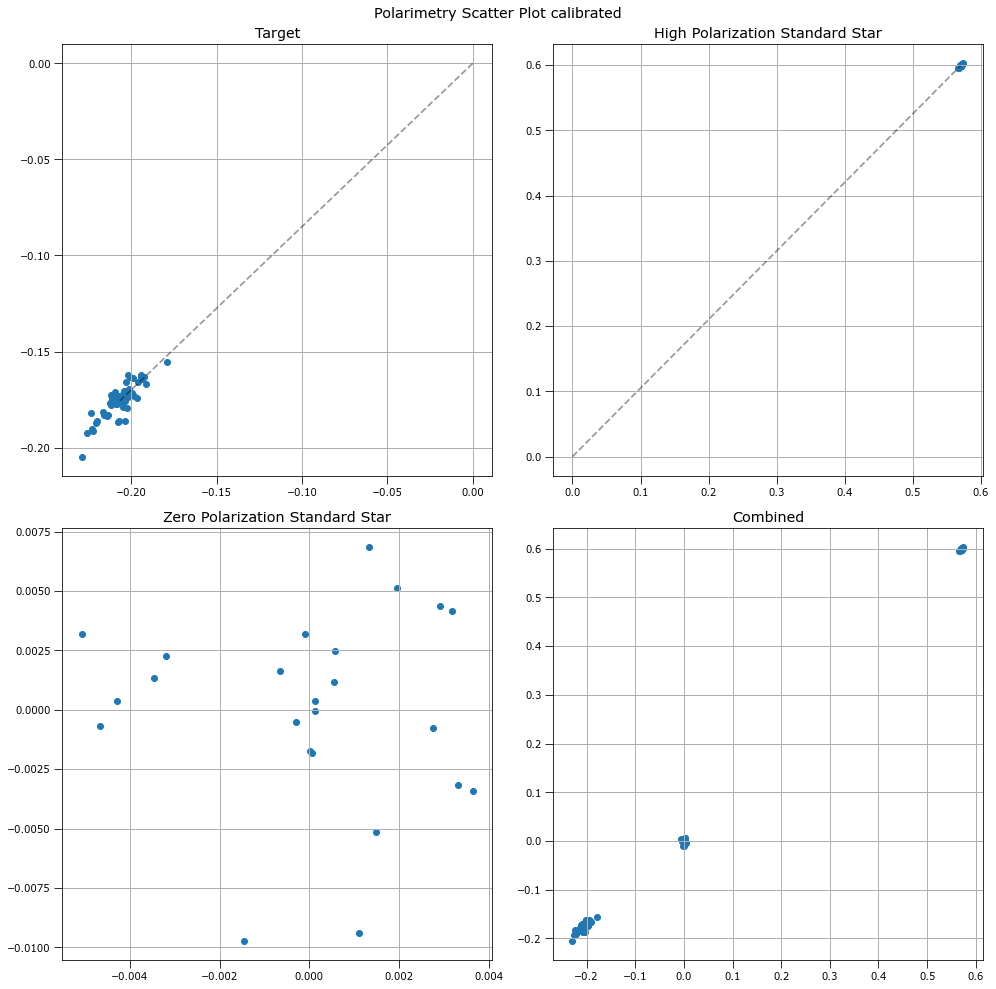

In [5]:
funcs_polarimetry.q_n_u_stack_plot(target_data_cal, zero_pol_std_cal, high_pol_std_cal, 'calibrated' , True )
target_pd_cal, zero_pol_pd_cal, high_pol_pd_cal = funcs_polarimetry.calc_pd(target_data_cal, zero_pol_std_cal, high_pol_std_cal)
print("")
target_pa_cal, zero_pol_pa_cal, high_pol_pa_cal = funcs_polarimetry.calc_pa(target_data, zero_pol_std, high_pol_std)

print("\nPA offset:", high_pol_pa-high_pol_pa_cal)
#to find the PA offset, you need to take the old target PA - new target PA

In [6]:
MJD = '2020-03-05'
obs_filter='P3-R'
targ_name='EE_Cep'
low_pol_std='G191B2B'
high_pol_std='HD215806'

target = "./stats/"+MJD +"/target/"+targ_name+"/"+obs_filter+"/master_2020-03-05_eecep_P3-R51-102_t2-t3swap.xlsx"
zero_pol_std = "./stats/"+MJD +"/pol_std/"+low_pol_std+"/"+obs_filter+"/master_2020-03-05_g191b2b_P3-R23-46_swapped.xlsx"
high_pol_std = "./stats/"+MJD +"/pol_std/"+high_pol_std+"/"+obs_filter+"/master_2020-03-05_hd215806_P3-R76-106_swapped.xlsx"

target_data = funcs_polarimetry.load_pol_data(target)
zero_pol_std = funcs_polarimetry.load_pol_data(zero_pol_std)
high_pol_std = funcs_polarimetry.load_pol_data(high_pol_std )

Target PD: 0.21787019707950536
Zero pol PD: 0.4794035180131885
Target PD: 1.31669307561466

Target PA: 0.4266545155605606
Zero pol std PA: 0.4071052243175651
High pol std PA: 0.3932320760922133

Zero Pol Offset q: 0.3486144928166004 u: 0.3290830723109987 



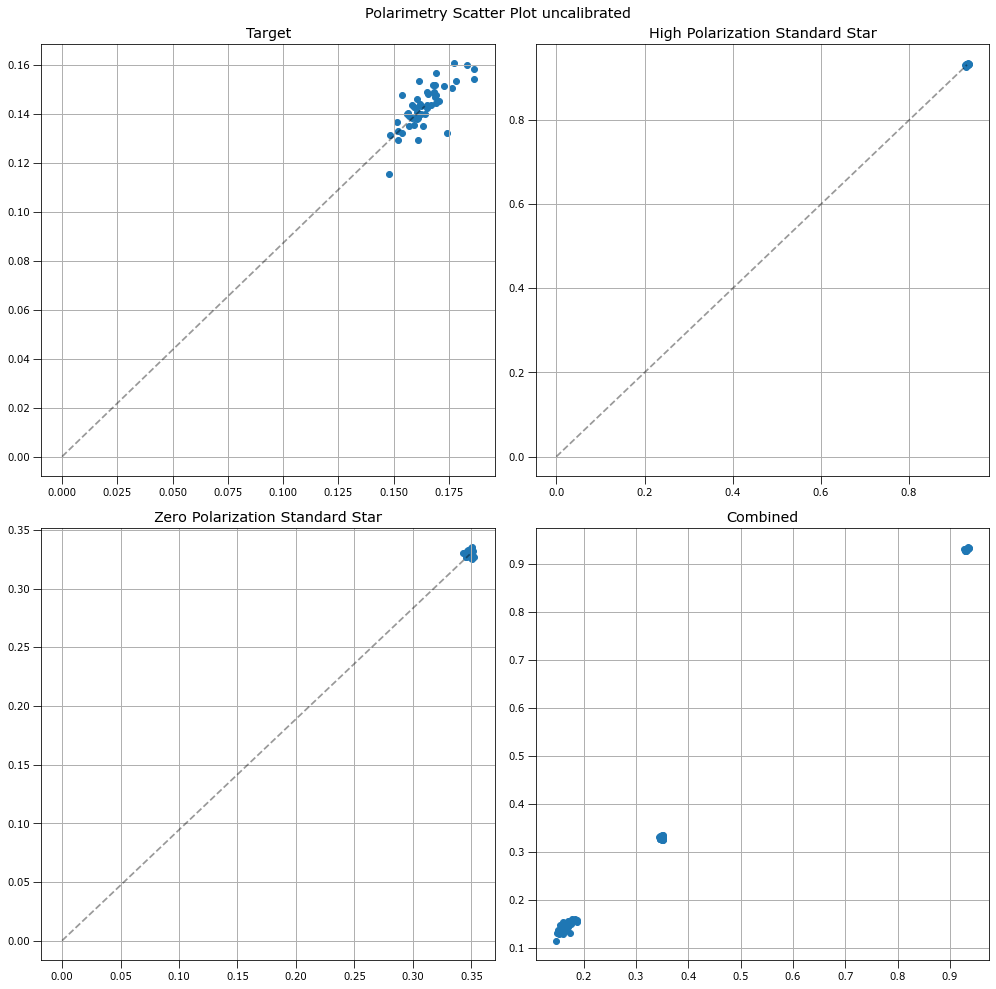

In [7]:
#this is the target

funcs_polarimetry.q_n_u_stack_plot(target_data, zero_pol_std, high_pol_std, 'uncalibrated' ,True )

zero_pol_mean_q, zero_pol_mean_u, median_q, median_u = funcs_polarimetry.q_u_stats(zero_pol_std[0][1:] ,zero_pol_std[1][1:] ,zero_pol_std[2][1:] ,zero_pol_std[3][1:] )
target_pd, zero_pol_pd, high_pol_pd = funcs_polarimetry.calc_pd(target_data, zero_pol_std, high_pol_std)
print("")
target_pa, zero_pol_pa, high_pol_pa = funcs_polarimetry.calc_pa(target_data, zero_pol_std, high_pol_std)
print("\nZero Pol Offset", "q:", zero_pol_mean_q,  "u:", zero_pol_mean_u,"\n")

In [8]:
target_data_cal, zero_pol_std_cal, high_pol_std_cal = funcs_polarimetry.correct_q_u(target_data, zero_pol_std, high_pol_std, (zero_pol_mean_q, zero_pol_mean_u))

Target PD: 0.2618383600413269
Zero pol PD: 2.6371854355350803e-17
Target PD: 0.837579683864024

Target PA: 0.39083994541186573
Zero pol std PA: -0.1331260245754627
High pol std PA: 0.38529221991928003

PA offset: 0.007939856172933246


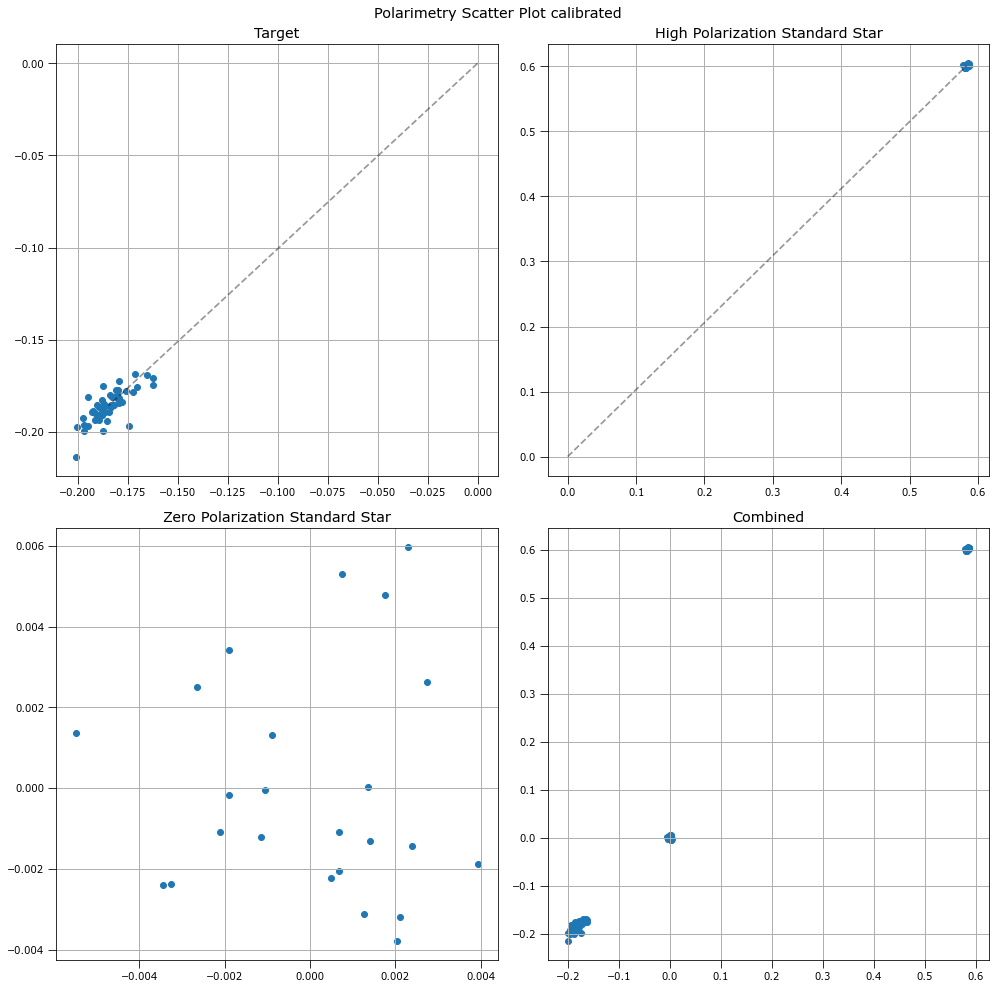

In [9]:
funcs_polarimetry.q_n_u_stack_plot(target_data_cal, zero_pol_std_cal, high_pol_std_cal, 'calibrated' , True )
target_pd_cal, zero_pol_pd_cal, high_pol_pd_cal = funcs_polarimetry.calc_pd(target_data_cal, zero_pol_std_cal, high_pol_std_cal)
print("")
target_pa_cal, zero_pol_pa_cal, high_pol_pa_cal = funcs_polarimetry.calc_pa(target_data, zero_pol_std, high_pol_std)

print("\nPA offset:", high_pol_pa-high_pol_pa_cal)
#to find the PA offset, you need to take the old target PA - new target PA

In [10]:
MJD = '2020-03-14'
obs_filter='P1-R'
targ_name='EE_Cep'
low_pol_std='G191B2B'
high_pol_std='HD215806'

target = "./stats/"+MJD +"/target/"+targ_name+"/"+obs_filter+"/master_2020-03-14_EE Cep_P1-R0-35.xlsx"
zero_pol_std = "./stats/"+MJD +"/pol_std/"+low_pol_std+"/"+obs_filter+"/master_2020-03-14_G191B2B_P1-R0-30_swapped.xlsx"
high_pol_std = "./stats/"+MJD +"/pol_std/"+high_pol_std+"/"+obs_filter+"/master_2020-03-14_HD215806_P1-R60-180_swapped.xlsx"

target_data = funcs_polarimetry.load_pol_data(target)
zero_pol_std = funcs_polarimetry.load_pol_data(zero_pol_std)
high_pol_std = funcs_polarimetry.load_pol_data(high_pol_std )

Target PD: 0.0811002577915125
Zero pol PD: 0.49272210084441637
Target PD: 1.3188482198125118

Target PA: 0.3394179476017418
Zero pol std PA: 0.4014891635939722
High pol std PA: 0.3913491614185053

Zero Pol Offset q: 0.35447803946903883 u: 0.3422285613368963 



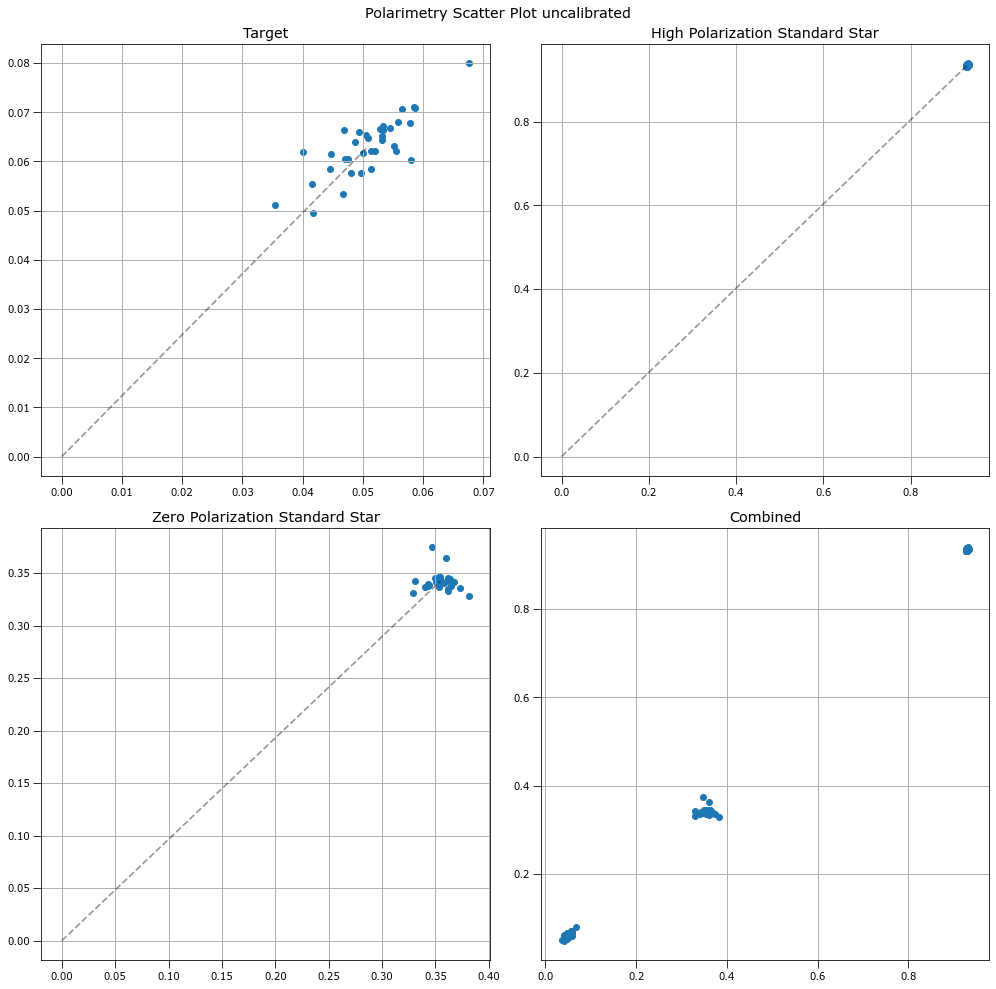

In [11]:
#this is the target

funcs_polarimetry.q_n_u_stack_plot(target_data, zero_pol_std, high_pol_std, 'uncalibrated' ,True )

zero_pol_mean_q, zero_pol_mean_u, median_q, median_u = funcs_polarimetry.q_u_stats(zero_pol_std[0][1:] ,zero_pol_std[1][1:] ,zero_pol_std[2][1:] ,zero_pol_std[3][1:] )
target_pd, zero_pol_pd, high_pol_pd = funcs_polarimetry.calc_pd(target_data, zero_pol_std, high_pol_std)
print("")
target_pa, zero_pol_pa, high_pol_pa = funcs_polarimetry.calc_pa(target_data, zero_pol_std, high_pol_std)
print("\nZero Pol Offset", "q:", zero_pol_mean_q,  "u:", zero_pol_mean_u,"\n")

In [12]:
target_data_cal, zero_pol_std_cal, high_pol_std_cal = funcs_polarimetry.correct_q_u(target_data, zero_pol_std, high_pol_std, (zero_pol_mean_q, zero_pol_mean_u))

Target PD: 0.412368265945002
Zero pol PD: 4.551080422229057e-17
Target PD: 0.826287852177595

Target PA: 0.41366655043639267
Zero pol std PA: 0.1608752771983211
High pol std PA: 0.38530286356152316

PA offset: 0.00604629785698213


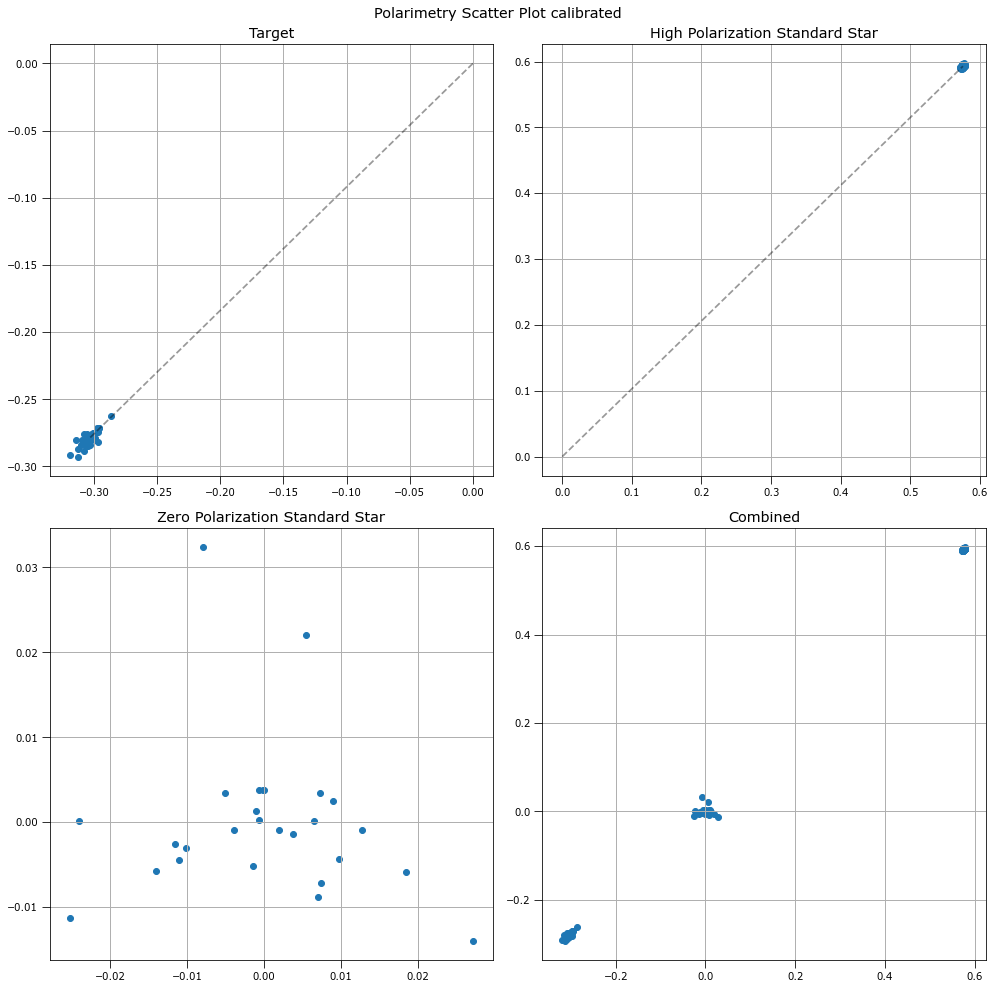

In [13]:
funcs_polarimetry.q_n_u_stack_plot(target_data_cal, zero_pol_std_cal, high_pol_std_cal, 'calibrated' , True )
target_pd_cal, zero_pol_pd_cal, high_pol_pd_cal = funcs_polarimetry.calc_pd(target_data_cal, zero_pol_std_cal, high_pol_std_cal)
print("")
target_pa_cal, zero_pol_pa_cal, high_pol_pa_cal = funcs_polarimetry.calc_pa(target_data, zero_pol_std, high_pol_std)

print("\nPA offset:", high_pol_pa-high_pol_pa_cal)
#to find the PA offset, you need to take the old target PA - new target PA

In [14]:
MJD = '2020-03-14'
obs_filter='P3-R'
targ_name='EE_Cep'
low_pol_std='G191B2B'
high_pol_std='HD215806'

target = "./stats/"+MJD +"/target/"+targ_name+"/"+obs_filter+"/master_2020-03-14_EE Cep_P3-R35-69_swapped.xlsx"
zero_pol_std = "./stats/"+MJD +"/pol_std/"+low_pol_std+"/"+obs_filter+"/master_2020-03-14_G191B2B_P3-R30-60_swapped.xlsx"
high_pol_std = "./stats/"+MJD +"/pol_std/"+high_pol_std+"/"+obs_filter+"/master_2020-03-14_HD215806_P3-R181-300_swapped.xlsx"

target_data = funcs_polarimetry.load_pol_data(target)
zero_pol_std = funcs_polarimetry.load_pol_data(zero_pol_std)
high_pol_std = funcs_polarimetry.load_pol_data(high_pol_std )

Target PD: 0.08343176727298425
Zero pol PD: 0.4840747410315948
Target PD: 1.3162849771883829

Target PA: 0.49184512493648724
Zero pol std PA: 0.4204425246612843
High pol std PA: 0.39343430523351863

Zero Pol Offset q: 0.36074874535891416 u: 0.3227827405961708 



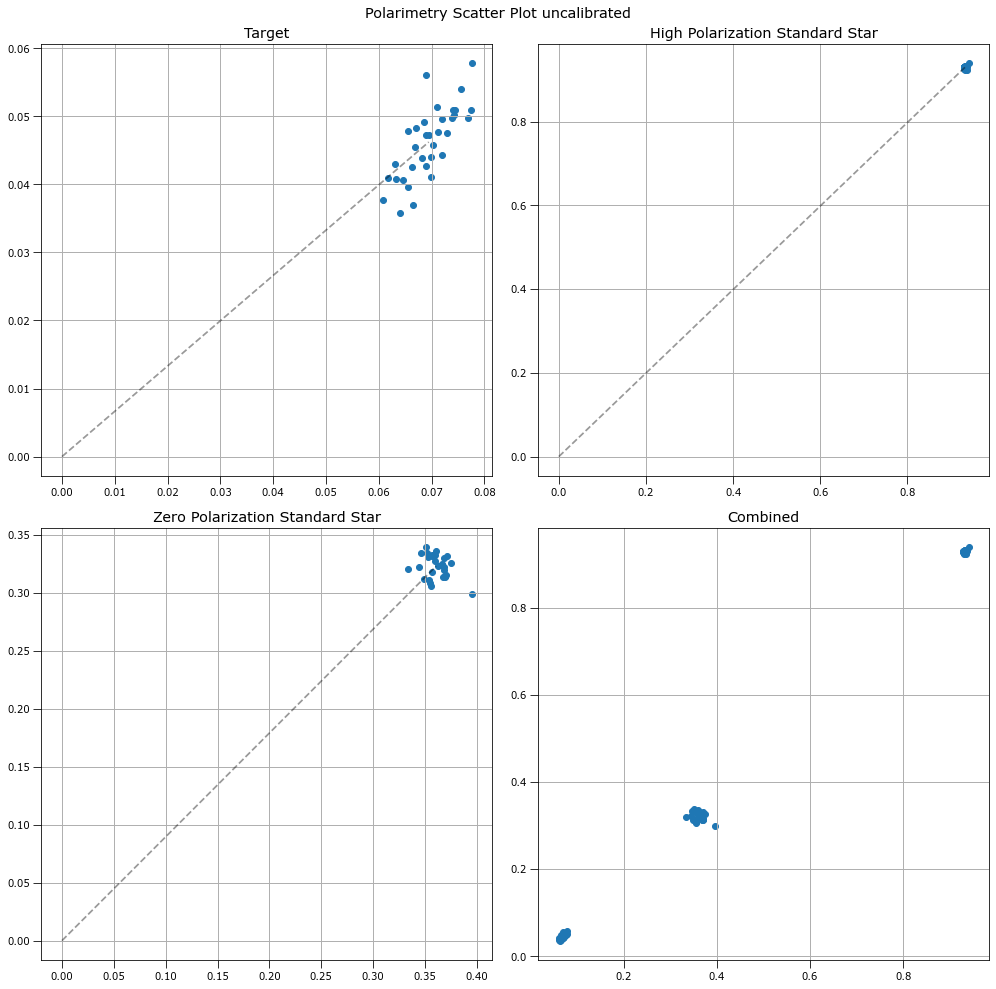

In [15]:
#this is the target

funcs_polarimetry.q_n_u_stack_plot(target_data, zero_pol_std, high_pol_std, 'uncalibrated' ,True )

zero_pol_mean_q, zero_pol_mean_u, median_q, median_u = funcs_polarimetry.q_u_stats(zero_pol_std[0][1:] ,zero_pol_std[1][1:] ,zero_pol_std[2][1:] ,zero_pol_std[3][1:] )
target_pd, zero_pol_pd, high_pol_pd = funcs_polarimetry.calc_pd(target_data, zero_pol_std, high_pol_std)
print("")
target_pa, zero_pol_pa, high_pol_pa = funcs_polarimetry.calc_pa(target_data, zero_pol_std, high_pol_std)
print("\nZero Pol Offset", "q:", zero_pol_mean_q,  "u:", zero_pol_mean_u,"\n")

In [16]:
target_data_cal, zero_pol_std_cal, high_pol_std_cal = funcs_polarimetry.correct_q_u(target_data, zero_pol_std, high_pol_std, (zero_pol_mean_q, zero_pol_mean_u))

Target PD: 0.4016678020404924
Zero pol PD: 1.3343220141622406e-17
Target PD: 0.8333262112533913

Target PA: 0.40565945567431144
Zero pol std PA: 0.29400130177378375
High pol std PA: 0.37775043144766746

PA offset: 0.015683873785851177


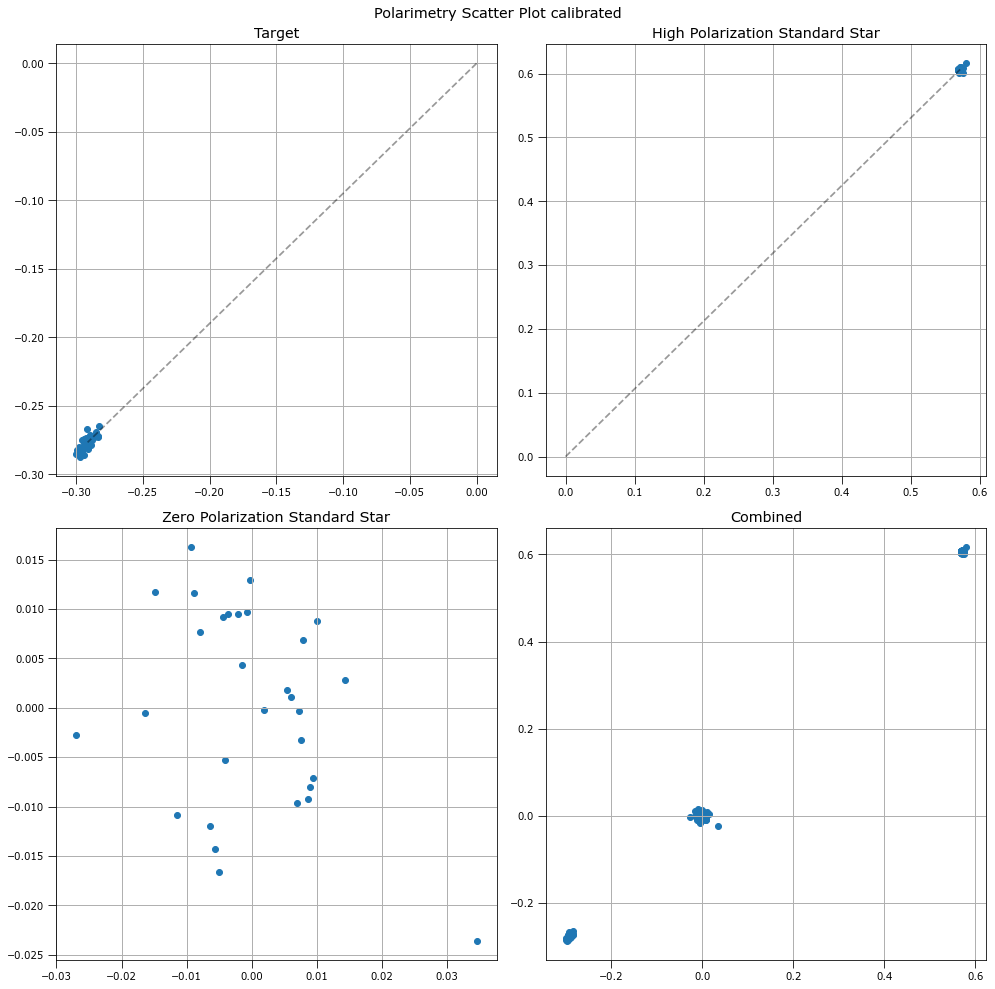

In [17]:
funcs_polarimetry.q_n_u_stack_plot(target_data_cal, zero_pol_std_cal, high_pol_std_cal, 'calibrated' , True )
target_pd_cal, zero_pol_pd_cal, high_pol_pd_cal = funcs_polarimetry.calc_pd(target_data_cal, zero_pol_std_cal, high_pol_std_cal)
print("")
target_pa_cal, zero_pol_pa_cal, high_pol_pa_cal = funcs_polarimetry.calc_pa(target_data, zero_pol_std, high_pol_std)

print("\nPA offset:", high_pol_pa-high_pol_pa_cal)
#to find the PA offset, you need to take the old target PA - new target PA

In [18]:
#Now Do 15

In [19]:
MJD = '2020-03-15'
obs_filter='P1-R'
targ_name='EE_Cep'
low_pol_std='G191B2B'
high_pol_std='HD215806'

target = "./stats/"+MJD +"/target/"+targ_name+"/"+obs_filter+"/master_2020-03-15_EE Cep_P1-R19-39.xlsx"
zero_pol_std = "./stats/"+MJD +"/pol_std/"+low_pol_std+"/"+obs_filter+"/master_2020-03-15_G191B2B_P1-R0-20_swapped.xlsx"
high_pol_std = "./stats/"+MJD +"/pol_std/"+high_pol_std+"/"+obs_filter+"/master_2020-03-15_HD215806_P1-R40-75.xlsx"

target_data = funcs_polarimetry.load_pol_data(target)
zero_pol_std = funcs_polarimetry.load_pol_data(zero_pol_std)
high_pol_std = funcs_polarimetry.load_pol_data(high_pol_std )

Target PD: 0.1470712300903594
Zero pol PD: 0.49904632041967334
Target PD: 1.320080166571526

Target PA: 0.37287972527912294
Zero pol std PA: 0.4074171189347758
High pol std PA: 0.3913492285450856

Zero Pol Offset q: 0.3631120401888978 u: 0.34234029297509155 



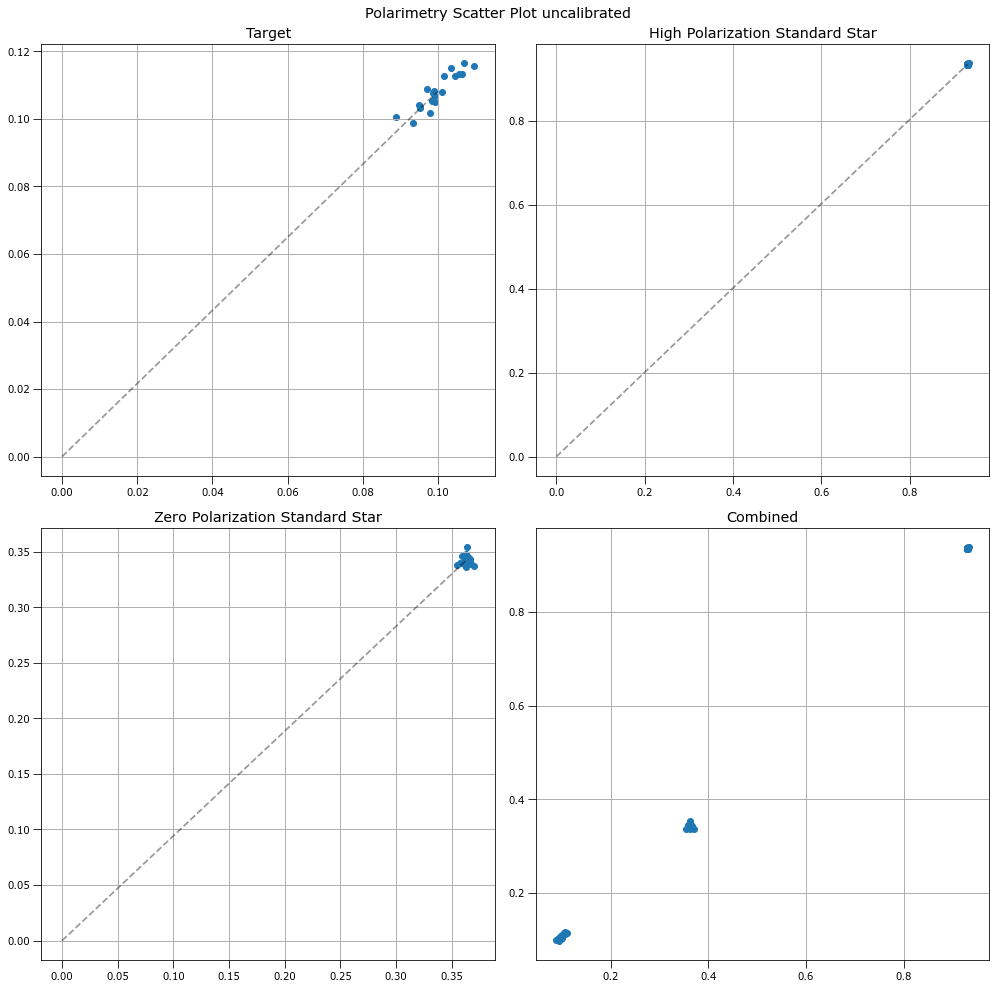

In [20]:
#this is the target

funcs_polarimetry.q_n_u_stack_plot(target_data, zero_pol_std, high_pol_std, 'uncalibrated' ,True )

zero_pol_mean_q, zero_pol_mean_u, median_q, median_u = funcs_polarimetry.q_u_stats(zero_pol_std[0][1:] ,zero_pol_std[1][1:] ,zero_pol_std[2][1:] ,zero_pol_std[3][1:] )
target_pd, zero_pol_pd, high_pol_pd = funcs_polarimetry.calc_pd(target_data, zero_pol_std, high_pol_std)
print("")
target_pa, zero_pol_pa, high_pol_pa = funcs_polarimetry.calc_pa(target_data, zero_pol_std, high_pol_std)
print("\nZero Pol Offset", "q:", zero_pol_mean_q,  "u:", zero_pol_mean_u,"\n")

In [21]:
target_data_cal, zero_pol_std_cal, high_pol_std_cal = funcs_polarimetry.correct_q_u(target_data, zero_pol_std, high_pol_std, (zero_pol_mean_q, zero_pol_mean_u))

Target PD: 0.3524720104960659
Zero pol PD: 6.206335383118183e-18
Target PD: 0.8214480183260379

Target PA: 0.421818604241173
Zero pol std PA: 0.23182380450040305
High pol std PA: 0.38158871962691526

PA offset: 0.009760508918170319


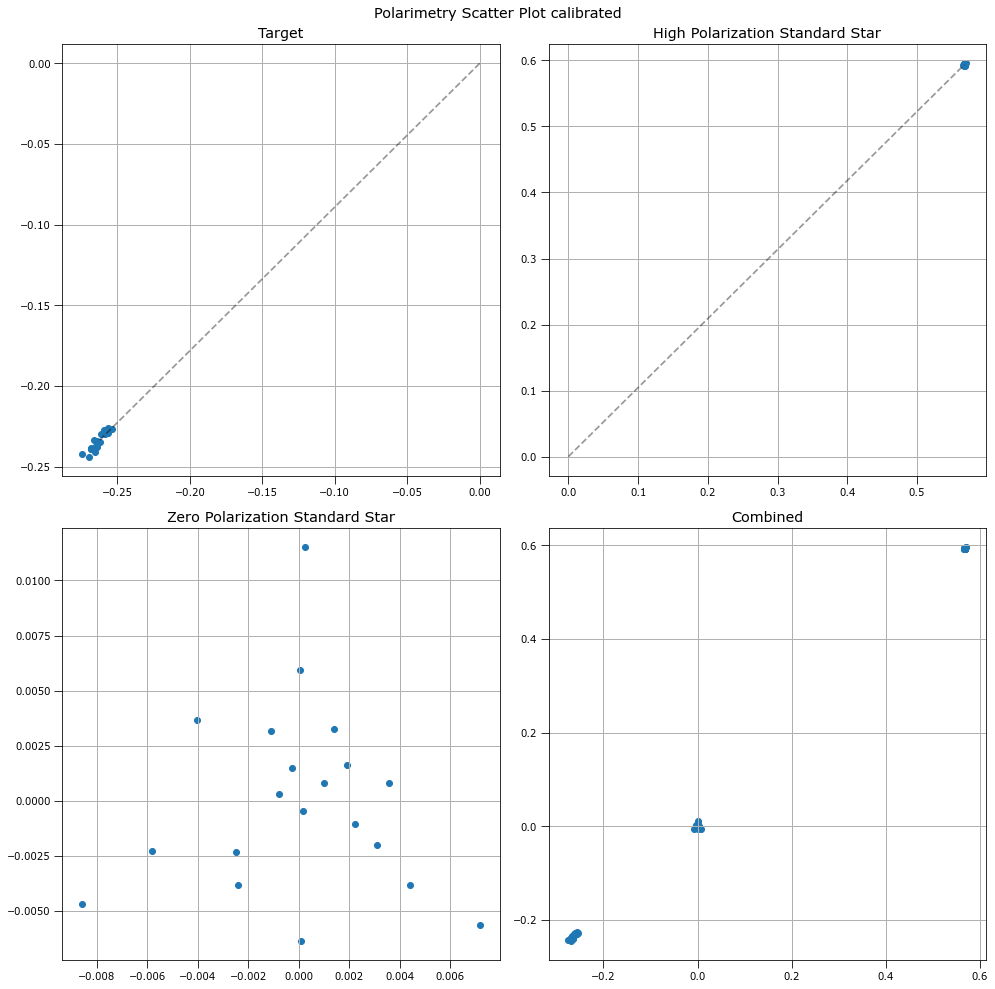

In [22]:
funcs_polarimetry.q_n_u_stack_plot(target_data_cal, zero_pol_std_cal, high_pol_std_cal, 'calibrated' , True )
target_pd_cal, zero_pol_pd_cal, high_pol_pd_cal = funcs_polarimetry.calc_pd(target_data_cal, zero_pol_std_cal, high_pol_std_cal)
print("")
target_pa_cal, zero_pol_pa_cal, high_pol_pa_cal = funcs_polarimetry.calc_pa(target_data, zero_pol_std, high_pol_std)

print("\nPA offset:", high_pol_pa-high_pol_pa_cal)
#to find the PA offset, you need to take the old target PA - new target PA

In [23]:
MJD = '2020-03-15'
obs_filter='P3-R'
targ_name='EE_Cep'
low_pol_std='G191B2B'
high_pol_std='HD215806'

target = "./stats/"+MJD +"/target/"+targ_name+"/"+obs_filter+"/master_2020-03-15_EE Cep_P3-R39-59_swapped.xlsx"
zero_pol_std = "./stats/"+MJD +"/pol_std/"+low_pol_std+"/"+obs_filter+"/master_2020-03-15_G191B2B_P3-R20-40_swapped.xlsx"
high_pol_std = "./stats/"+MJD +"/pol_std/"+high_pol_std+"/"+obs_filter+"/master_2020-03-15_HD215806_P3-R75-109_swapped.xlsx"

target_data = funcs_polarimetry.load_pol_data(target)
zero_pol_std = funcs_polarimetry.load_pol_data(zero_pol_std)
high_pol_std = funcs_polarimetry.load_pol_data(high_pol_std )

Target PD: 0.14875856679232335
Zero pol PD: 0.4860372423813757
Target PD: 1.3181113051342035

Target PA: 0.4496293753986076
Zero pol std PA: 0.40334926049550995
High pol std PA: 0.39276281074336716

Zero Pol Offset q: 0.3509222264355182 u: 0.3362823099350173 



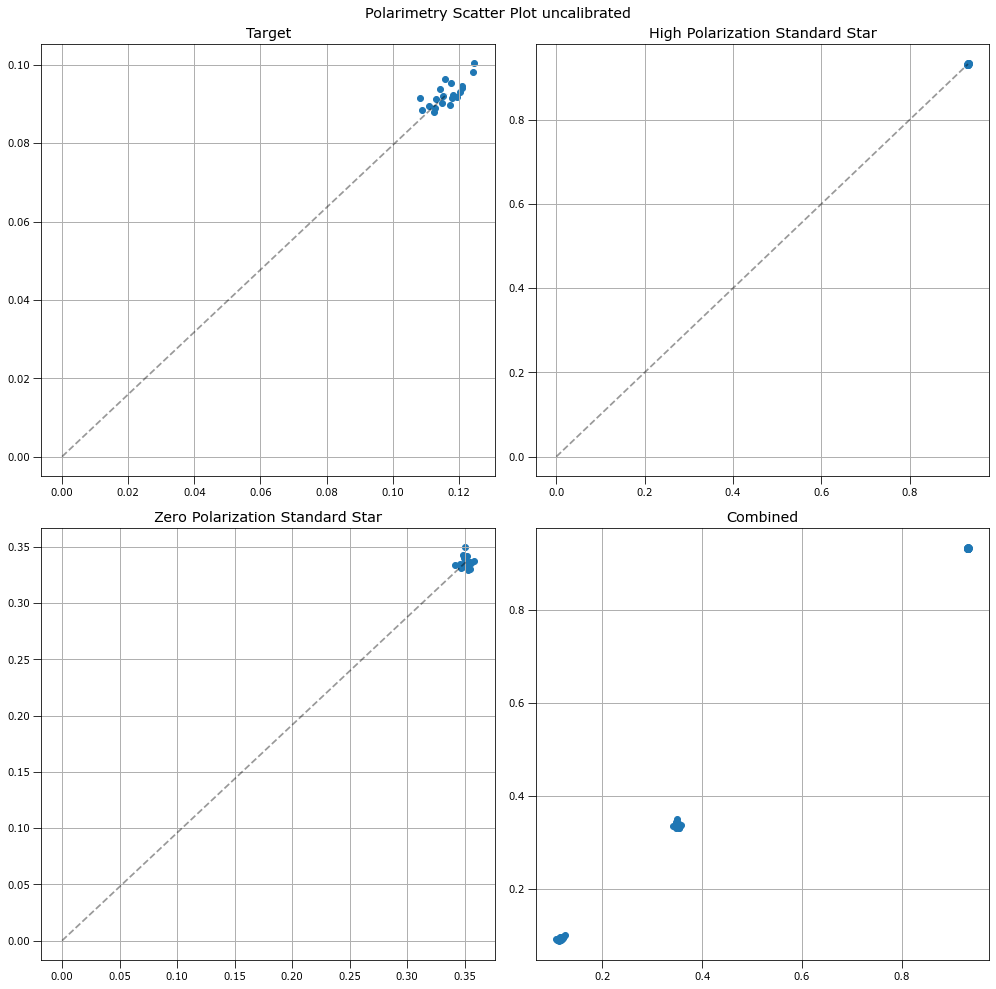

In [24]:
#this is the target

funcs_polarimetry.q_n_u_stack_plot(target_data, zero_pol_std, high_pol_std, 'uncalibrated' ,True )

zero_pol_mean_q, zero_pol_mean_u, median_q, median_u = funcs_polarimetry.q_u_stats(zero_pol_std[0][1:] ,zero_pol_std[1][1:] ,zero_pol_std[2][1:] ,zero_pol_std[3][1:] )
target_pd, zero_pol_pd, high_pol_pd = funcs_polarimetry.calc_pd(target_data, zero_pol_std, high_pol_std)
print("")
target_pa, zero_pol_pa, high_pol_pa = funcs_polarimetry.calc_pa(target_data, zero_pol_std, high_pol_std)
print("\nZero Pol Offset", "q:", zero_pol_mean_q,  "u:", zero_pol_mean_u,"\n")

In [25]:
target_data_cal, zero_pol_std_cal, high_pol_std_cal = funcs_polarimetry.correct_q_u(target_data, zero_pol_std, high_pol_std, (zero_pol_mean_q, zero_pol_mean_u))

Target PD: 0.3381950687151848
Zero pol PD: 7.221785298249066e-17
Target PD: 0.832246618358046

Target PA: 0.3830159286610003
Zero pol std PA: -0.019221295010593994
High pol std PA: 0.3865805621203675

PA offset: 0.006182248622999653


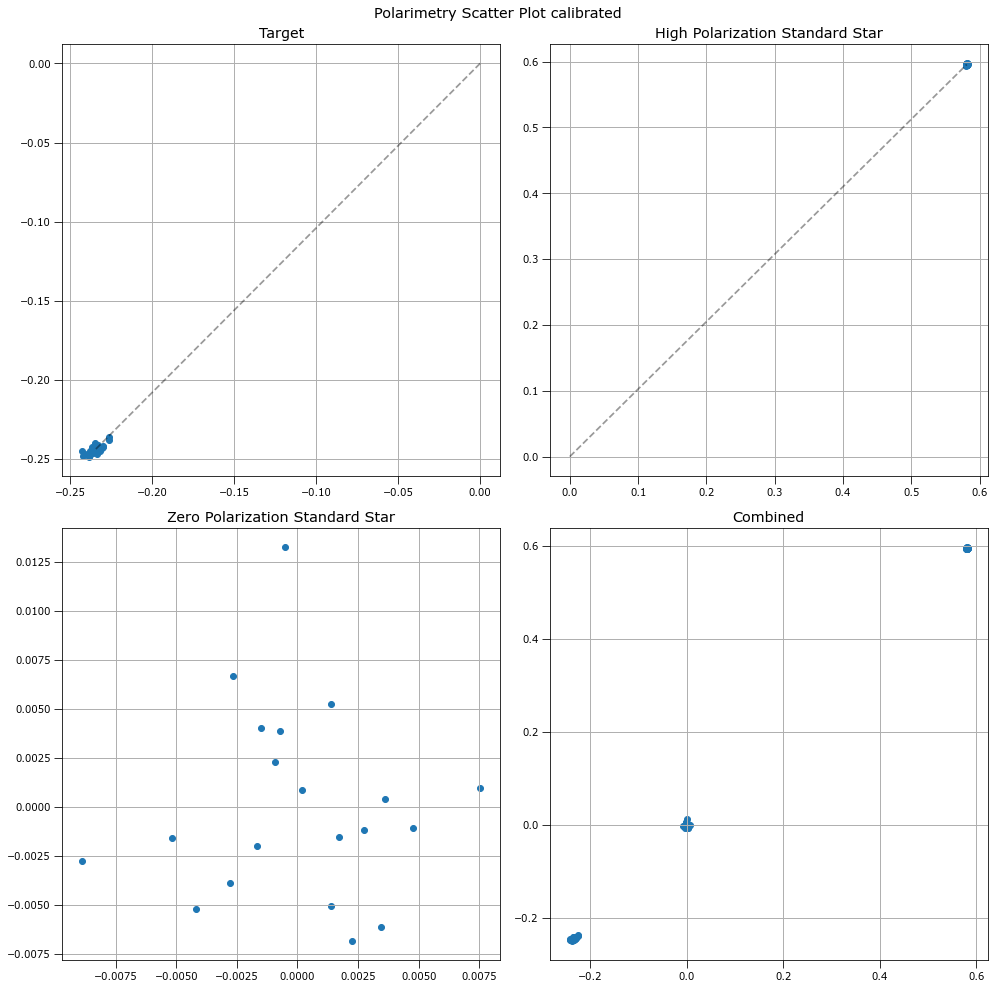

In [26]:
funcs_polarimetry.q_n_u_stack_plot(target_data_cal, zero_pol_std_cal, high_pol_std_cal, 'calibrated' , True )
target_pd_cal, zero_pol_pd_cal, high_pol_pd_cal = funcs_polarimetry.calc_pd(target_data_cal, zero_pol_std_cal, high_pol_std_cal)
print("")
target_pa_cal, zero_pol_pa_cal, high_pol_pa_cal = funcs_polarimetry.calc_pa(target_data, zero_pol_std, high_pol_std)

print("\nPA offset:", high_pol_pa-high_pol_pa_cal)
#to find the PA offset, you need to take the old target PA - new target PA